In [1]:
#
# Import the modules we will need
#

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from statstar_python3_mda import StatStar


StatStar requires the following inputs:

mass (solar masses)  
luminosity (solar luminosities)  
effective temperature (K)  
hydrogen mass fraction  
metal mass fraction  


The output is written to a file "starmodl_py.dat" by default, but that can be changed
by using the "output" keyword. 

Output variables are given in 'cgs' units, i.e. cm for radius, erg/s for luminosity, dynes/cm$^2$ for pressure,
g/cm$^3$ for density.  

Note that the inputs cannot be totally arbitrary. Stars with a certain mass and effective temperature have a particular luminosity (or else the main sequence wouldn't exist!). Usually a certain amount of experimentation with the inputs needs to be done to find a valid model.  

Below is an attempt to generate a Sun-like star.


In [2]:


mass = 1.0
luminosity = 1.0
Teff = 5777.0
X = 0.7
Z = 0.008

StatStar(mass,luminosity,Teff,X,Z,output='mystar.dat')

Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
***** The integration has been completed *****
      The model has been stored in  mystar.dat


(5, 0, 423)

Note the message telling us that the model hasn't worked. 

Take a look at the output file (in an editor or in jupyter). There is some header information, followed by columns of numbers that give the physical variables as a function of radius. The 9th column is "r" or "c" for radiative or convective. Because the mass changes very slowly in the outer layers, a variable $Q_M \equiv 1 - m/M$ is used
instead of mass.

Here's an example of how to read the data into python, and make a plot.

In [3]:
# Lines starting with "#" are ignored by loadtxt.
# We use the 'usecols' argument to skip over the 9th column, which is not a number.
d = np.loadtxt('mystar.dat',usecols=(0,1,2,3,4,5,6,7,9))

r = d[:,0]
q = d[:,1]
L = d[:,2]
T = d[:,3]
P = d[:,4]
rho = d[:,5]

logT = np.log10(T)


C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/637392925.py:12: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)


In [4]:
# To read the list of characters in the 9th column that signify convective (c) or
# radiative (r) shells we can use
#

flags = np.genfromtxt('mystar.dat',usecols=8,dtype=str)

print(flags)



['c' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r

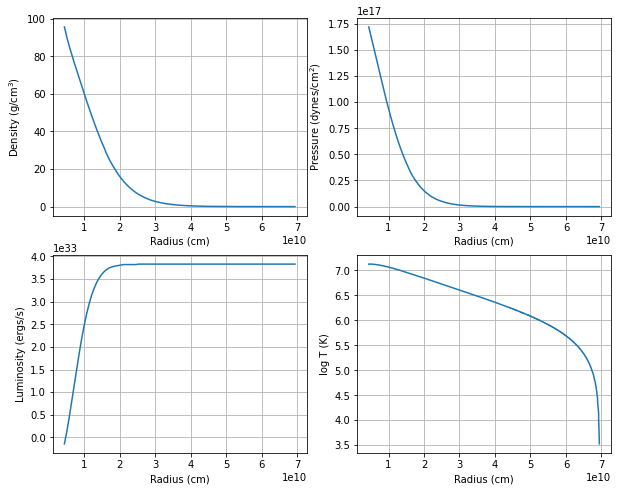

In [5]:
fig, ax = plt.subplots(2,2,figsize=(10,8))

ax[0,0].plot(r,rho,'-')
ax[0,0].set_xlabel(r'Radius (cm)')
ax[0,0].set_ylabel(r'Density (g/cm$^3$)')
ax[0,0].grid()

ax[0,1].plot(r,P,'-')
ax[0,1].set_xlabel(r'Radius (cm)')
ax[0,1].set_ylabel(r'Pressure (dynes/cm$^2$)')
ax[0,1].grid()

ax[1,0].plot(r,L,'-')
ax[1,0].set_xlabel(r'Radius (cm)')
ax[1,0].set_ylabel(r'Luminosity (ergs/s)')
ax[1,0].grid()

ax[1,1].plot(r,logT,'-')
ax[1,1].set_xlabel(r'Radius (cm)')
ax[1,1].set_ylabel(r'log T (K)')
ax[1,1].grid()



StatStar is extremely sensitive to its inputs and it is generally quite time consuming to find a model that converges with no errors. Below is a set of parameters that works for a solar mass star. 

1. Run it and make plots of the density, pressure, luminosity and log temperature vs radius. Are they generally the shape you would expect?

2. Compute and plot m(r).

3. Repeat the plots using m/M as the independent variable.

4. For what fraction of the star's mass is nuclear fusion happening?

5. What is the temperature where fusion stops? Does this agree with the minimum temperature for the pp chain given in lectures?

In [75]:
mass = 1.0
luminosity = 0.860710
Teff = 5500.2
X = 0.7
Z = 0.008

StatStar(mass,luminosity,Teff,X,Z,output='mystar.dat')


CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  mystar.dat


(0, 0, 423)

C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/859008562.py:13: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)


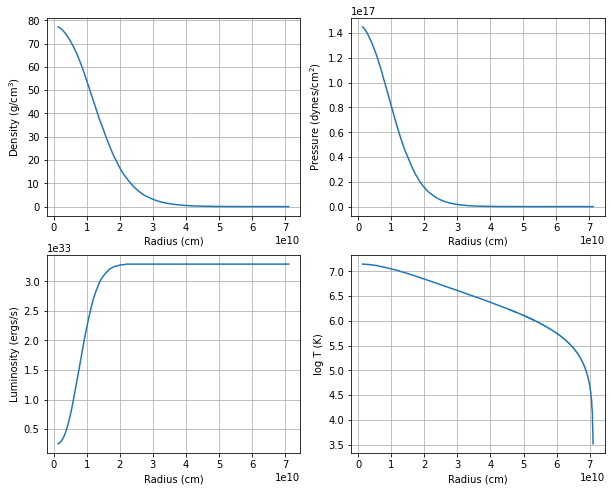

In [40]:
# Lines starting with "#" are ignored by loadtxt.
# We use the 'usecols' argument to skip over the 9th column, which is not a number.
d = np.loadtxt('mystar.dat',usecols=(0,1,2,3,4,5,6,7,9))

r = d[:,0]
q = d[:,1]
L = d[:,2]
T = d[:,3]
P = d[:,4]
rho = d[:,5]

logT = np.log10(T)

# To read the list of characters in the 9th column that signify convective (c) or
# radiative (r) shells we can use
#

flags = np.genfromtxt('mystar.dat',usecols=8,dtype=str)

#print(flags)

# Plotting
fig, ax = plt.subplots(2,2,figsize=(10,8))

ax[0,0].plot(r,rho,'-')
ax[0,0].set_xlabel(r'Radius (cm)')
ax[0,0].set_ylabel(r'Density (g/cm$^3$)')
ax[0,0].grid()

ax[0,1].plot(r,P,'-')
ax[0,1].set_xlabel(r'Radius (cm)')
ax[0,1].set_ylabel(r'Pressure (dynes/cm$^2$)')
ax[0,1].grid()

ax[1,0].plot(r,L,'-')
ax[1,0].set_xlabel(r'Radius (cm)')
ax[1,0].set_ylabel(r'Luminosity (ergs/s)')
ax[1,0].grid()

ax[1,1].plot(r,logT,'-')
ax[1,1].set_xlabel(r'Radius (cm)')
ax[1,1].set_ylabel(r'log T (K)')
ax[1,1].grid()

shells = len(r)


In [53]:
m=np.zeros(shells)

for shell in range(shells)[0:-1]:
    m[shell+1] = m[shell] + 4*np.pi*r[shell]**2*rho[shell] * (r[shell+1] - r[shell])

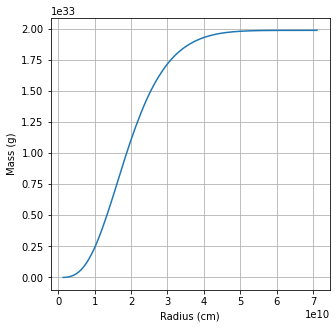

In [57]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(r,m,'-')
ax.set_xlabel(r'Radius (cm)')
ax.set_ylabel(r'Mass (g)')
ax.grid()

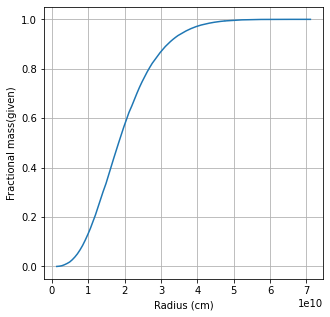

In [60]:
# Using given q
frac_m = (q -1)*-1

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(r,frac_m,'-')
ax.set_xlabel(r'Radius (cm)')
ax.set_ylabel(r'Fractional mass(given)')
ax.grid()

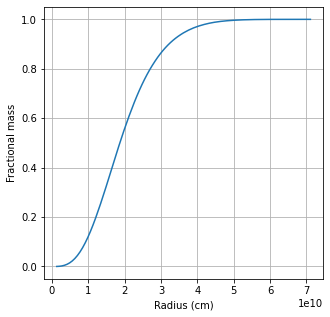

In [59]:
# Using my mass
M = m[-1]
frac2_m = m/M

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(r,frac2_m,'-')
ax.set_xlabel(r'Radius (cm)')
ax.set_ylabel(r'Fractional mass')
ax.grid()

Fusion appears to be occuring for around 60% of the stars mass. This means fusion stops around 10^(6.8), which agrees with the minimum temperature for the pp chain of (0.5-1.5)*10^7.

In [78]:
X = 0.7
Z = 0.008
mass,luminosity,Teff = np.genfromtxt("HW2data.txt",delimiter=",")
for star, mass_star in enumerate(mass):
    StatStar(mass[star],luminosity[star],Teff[star],X,Z,output=f'HWstar{star}.dat')

CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  HWstar0.dat
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  HWstar1.dat
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  HWstar2.dat
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  HWstar3.dat
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model carefully.
***** The integration has been completed *****
      The model has been stored in  HWstar4.dat
CONGRATULATIONS, I THINK YOU FOUND IT!
However, be sure to look at your model ca

C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)
C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)
C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)


Radiative and convective zone boundary found at radius = 4.130e+09cm
Radiative and convective zone boundary found at radius = 5.610e+09cm
Radiative and convective zone boundary found at radius = 1.330e+10cm


C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)
C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)
C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)
C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)


Radiative and convective zone boundary found at radius = 2.560e+10cm
Radiative and convective zone boundary found at radius = 3.730e+10cm
Radiative and convective zone boundary found at radius = 4.900e+10cm
Radiative and convective zone boundary found at radius = 5.790e+10cm


C:\Users\Timojhoe\AppData\Local\Temp/ipykernel_41548/2734765386.py:20: RuntimeWarning: divide by zero encountered in log10
  logT = np.log10(T)


Radiative and convective zone boundary found at radius = 7.390e+10cm


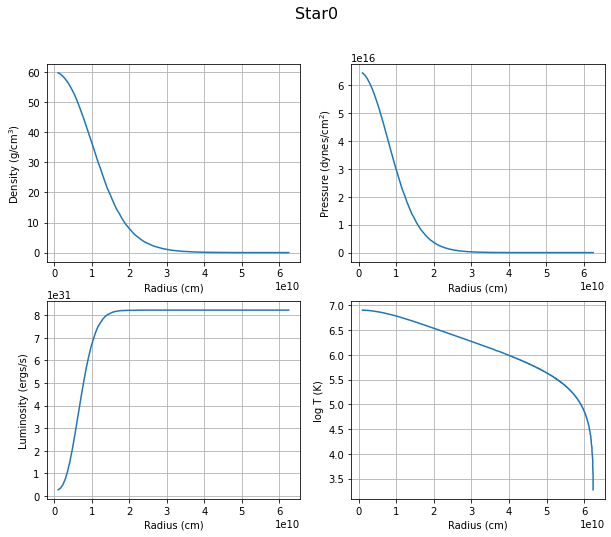

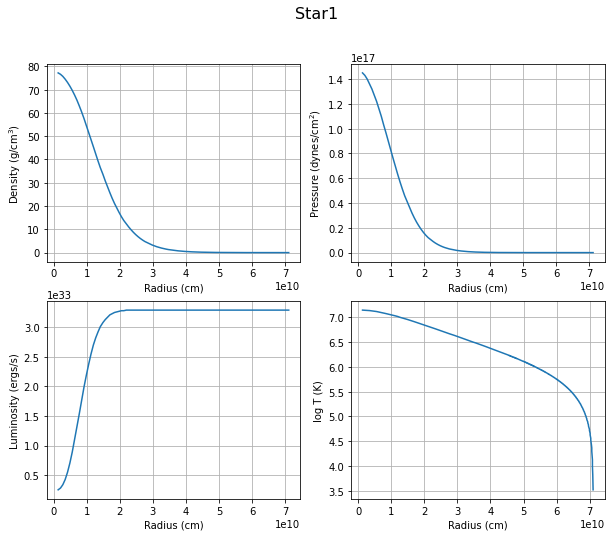

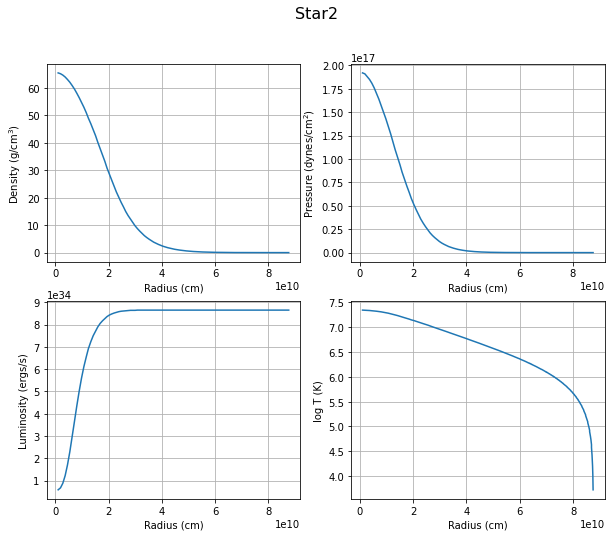

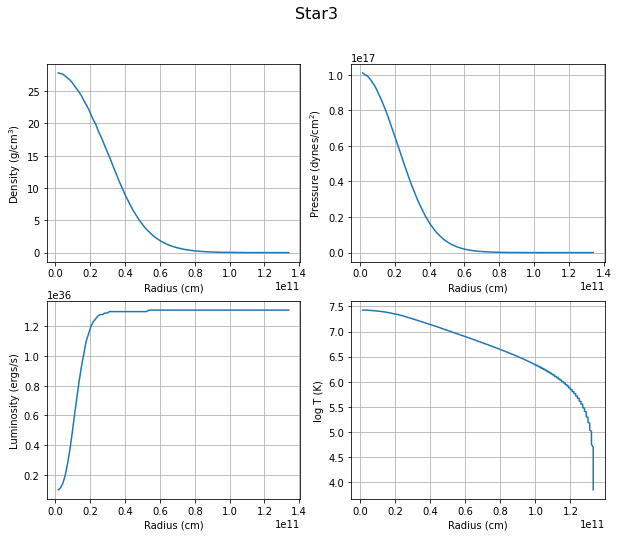

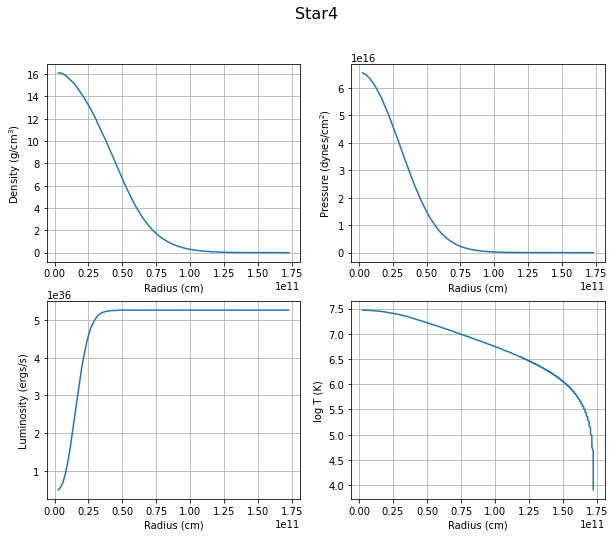

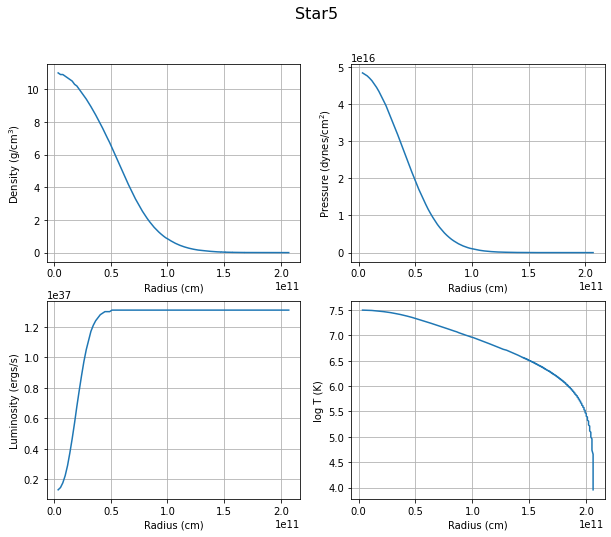

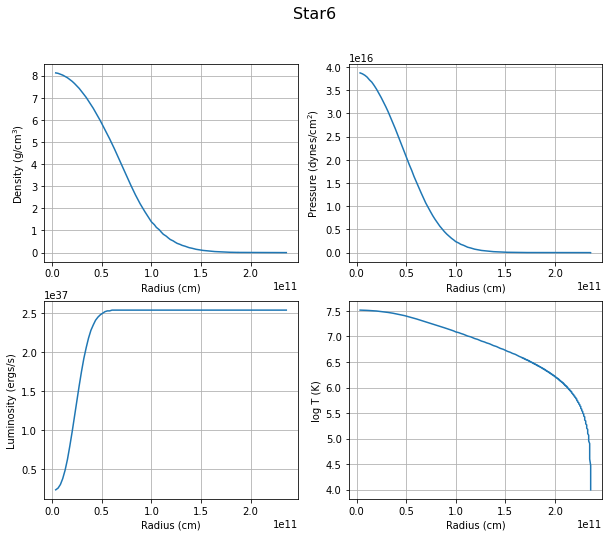

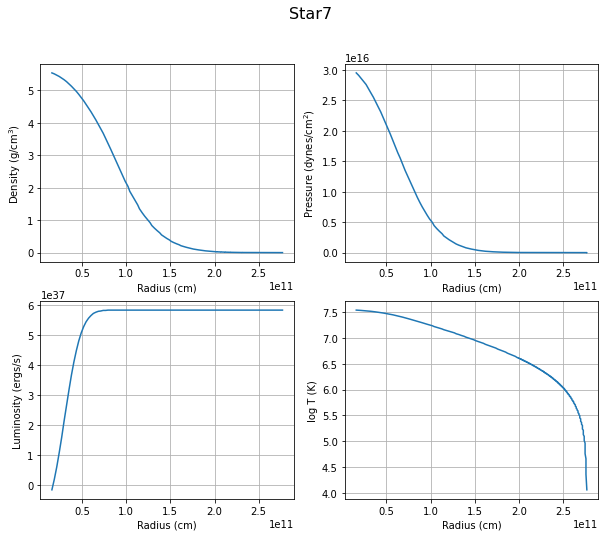

In [132]:
# lot of questions will be in here so I dont have to reloop over and over
boundary_fradius = []
boundary_fmass = []
nuclear_boundary = []
nuclear_boundary_m = []
nuclear_half = []
nuclear_half_m = []
radii = []
bigM = []
for star, mass_star in enumerate(mass):
    d = np.loadtxt(f'HWstar{star}.dat',usecols=(0,1,2,3,4,5,6,7,9))

    r = d[:,0]
    q = d[:,1]
    L = d[:,2]
    T = d[:,3]
    P = d[:,4]
    rho = d[:,5]

    logT = np.log10(T)

    flags = np.genfromtxt(f'HWstar{star}.dat',usecols=8,dtype=str)
    
    # Finds boundary if convective and radiative zones both exist
    if np.any(flags == 'c') and np.any(flags == 'r'):
        boundary = np.amax(np.where(flags == 'c'))
        print(f"Radiative and convective zone boundary found at radius = {r[boundary]:.3e}cm")
    else:
        print("No boundary found")
        
    boundary_fradius = np.append(boundary_fradius, r[boundary]/np.max(r))
    
    shells = len(r)
    m=np.zeros(shells)

    for shell in range(shells)[0:-1]:
        m[shell+1] = m[shell] + 4*np.pi*r[shell]**2*rho[shell] * (r[shell+1] - r[shell])
    
    boundary_fmass = np.append(boundary_fmass, m[boundary]/np.max(m))
    
    frac_lum = L/np.max(L)
    boundary_lum = np.amin(np.where(frac_lum >= 0.99))
    nuclear_boundary = np.append(nuclear_boundary, r[boundary_lum])
    nuclear_boundary_m = np.append(nuclear_boundary_m, m[boundary_lum])
    
    lum_half = np.amin(np.where(frac_lum >= 0.5))
    nuclear_half = np.append(nuclear_half, r[lum_half])
    nuclear_half_m = np.append(nuclear_half_m, m[lum_half])
    
    radii = np.append(radii, np.max(r))
    bigM = np.append(bigM, np.max(m))
    
    # Other generic graphs
    fig, ax = plt.subplots(2,2,figsize=(10,8))
    
    ax[0,0].plot(r,rho,'-')
    ax[0,0].set_xlabel(r'Radius (cm)')
    ax[0,0].set_ylabel(r'Density (g/cm$^3$)')
    ax[0,0].grid()

    ax[0,1].plot(r,P,'-')
    ax[0,1].set_xlabel(r'Radius (cm)')
    ax[0,1].set_ylabel(r'Pressure (dynes/cm$^2$)')
    ax[0,1].grid()

    ax[1,0].plot(r,L,'-')
    ax[1,0].set_xlabel(r'Radius (cm)')
    ax[1,0].set_ylabel(r'Luminosity (ergs/s)')
    ax[1,0].grid()

    ax[1,1].plot(r,logT,'-')
    ax[1,1].set_xlabel(r'Radius (cm)')
    ax[1,1].set_ylabel(r'log T (K)')
    ax[1,1].grid()
    
    fig.suptitle(f'Star{star}', fontsize=16)

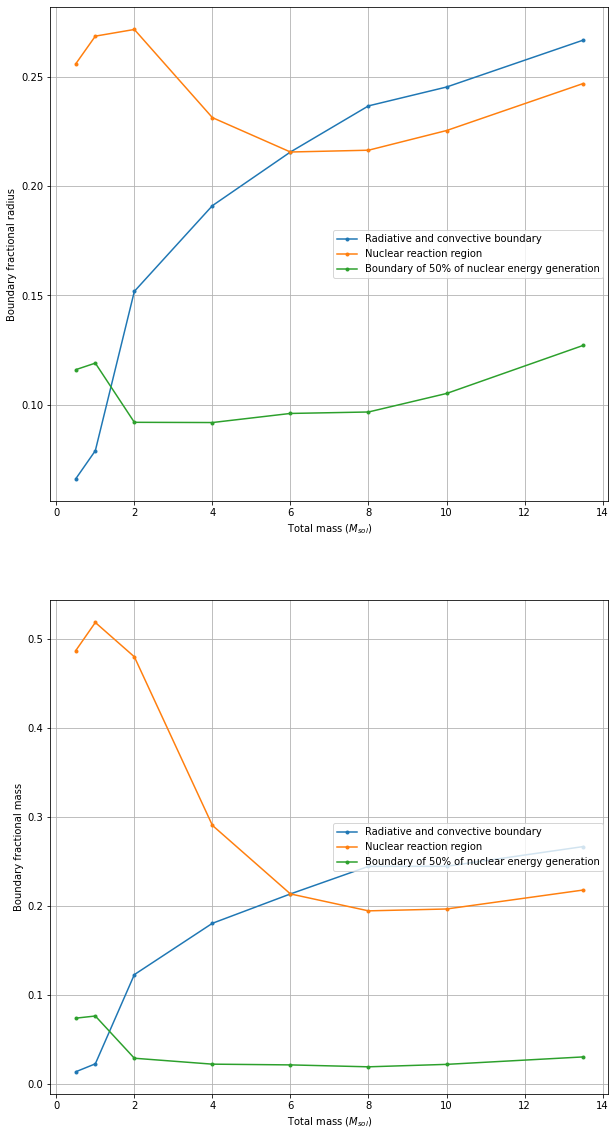

In [137]:
nuclear_boundary_frac = nuclear_boundary/radii
nuclear_half_frac = nuclear_half/radii
nuclear_boundary_frac_m = nuclear_boundary_m / bigM
nuclear_half_frac_m =nuclear_half_m/bigM
# Plotting
fig, ax = plt.subplots(2,1,figsize=(10,20))

ax[0].plot(mass,boundary_fradius,ls='-', marker='.', label="Radiative and convective boundary")
ax[0].plot(mass,nuclear_boundary_frac, ls='-', marker='.', label="Nuclear reaction region")
ax[0].plot(mass,nuclear_half_frac, ls='-', marker='.', label="Boundary of 50% of nuclear energy generation")
ax[0].set_xlabel(r'Total mass ($M_{sol}$)')
ax[0].set_ylabel(r'Boundary fractional radius')
ax[0].grid()
ax[0].legend(loc="right")

ax[1].plot(mass,boundary_fmass,ls='-', marker='.', label="Radiative and convective boundary")
ax[1].plot(mass,nuclear_boundary_frac_m, ls='-', marker='.', label="Nuclear reaction region")
ax[1].plot(mass,nuclear_half_frac_m, ls='-', marker='.', label="Boundary of 50% of nuclear energy generation")
ax[1].set_xlabel(r'Total mass ($M_{sol}$)')
ax[1].set_ylabel(r'Boundary fractional mass')
ax[1].grid()
ax[1].legend(loc="right")

In [117]:
print(f"The relative boundaries for nuclear reactions are at radii {nuclear_boundary}cm")

The relative boundaries for nuclear reactions are [1.60e+10 1.91e+10 2.38e+10 3.10e+10 3.73e+10 4.48e+10 5.32e+10 6.84e+10]


In [119]:
print(f"The relative boundaries within which 50% of the energy generation is taking place are at radii {nuclear_half}cm")

The relative boundaries within which 50% of the energy geenration is taking place are at radii [7.25e+09 8.46e+09 8.05e+09 1.23e+10 1.66e+10 2.00e+10 2.48e+10 3.52e+10]cm


I expect that the CNO cycle dominates over the pp-chain in the nuclear burning region for stars with a majority of nuclear energy in the temperature range over 1.5 * 10^7 K. From these plots this appears to be stars with mass 1-2 $M_{sol}$ or more.

These models do suggest He-burning is occurring in stars 3-8 and almost in star 2. 

I would expect that for stars larger than 6 $M_{sol}$ convection will carry the products of nuclear fusion out of the nuclear burning region.